## Assignment 2, Problem 2

In [1]:
# Load packages
using Images
using LinearAlgebra
using PyPlot
using Printf
using Statistics

In [2]:
# Load images from the yale_faces directory and return a MxN data matrix,
# where M is the number of pixels per face image and N is the number of images.
# Also return the dimensions of a single face image and the number of all face images
function loadfaces()
  facedim = [96 84]
  n = 38*20
  data = zeros(96*84,n)
  c = 1
  for f = 1:38
    for i = 1:20
      im = PyPlot.imread(@sprintf("../data-julia/yale_faces/yaleBs%02i/%02i.pgm",f,i))
      data[:,c] = im[:]
      c += 1
    end
  end

  return data::Array{Float64,2},facedim::Array{Int},n::Int
end
data,facedim,N = loadfaces()
println(facedim)
println(N)
println(size(data))

[96 84]
760
(8064, 760)


In [3]:
# Apply principal component analysis on the data matrix.
# Return the eigenvectors of covariance matrix of the data, the corresponding eigenvalues,
# the one-dimensional mean data matrix and a cumulated variance vector in increasing order.
function computepca(data::Array{Float64,2})

  # Center the data
  mu = mean(data,dims=2)
  X_hat = data .- mu

  # The SVD of the (centered) data matrix and the SVD of the covariance are related,
  # i.e. the left-singular vectors give us the eigenvectors of the covariance matrix
  # cf. slide 54/55
  U,s,_ = svd(X_hat)

  # We can compute the eigenvalues of the covariance matrix by means of the
  # singular values.
  lambda = s.^2 / size(X_hat,2)  # cf. slide 55

  # The magnitudes of the eigenvalues are proportional to the
  # amount of variance represented by their associated eigenvectors.
  cumvar = cumsum(lambda) ./ sum(lambda)   # cf. slide 49

  return U::Array{Float64,2},lambda::Array{Float64,1},mu::Array{Float64,2},cumvar::Array{Float64,1}
end
U,lambda,mu,cumvar = computepca(data)
println(size(U))

(8064, 760)


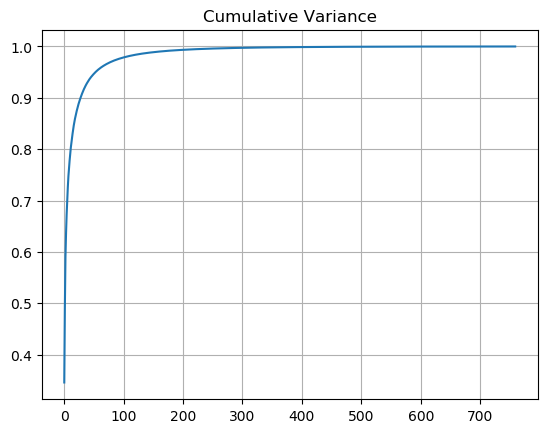

In [4]:
# Plot the cumulative variance of the principal components
function plotcumvar(cumvar::Array{Float64,1})
  figure()
  plot(cumvar)
  grid("on")
  title("Cumulative Variance")
  gcf()
  return nothing::Nothing
end
plotcumvar(cumvar)

In [5]:
# Compute required number of components to account for (at least) 75/99% of the variance
function computecomponents(cumvar::Array{Float64,1})
  n75 = findfirst(cumvar .> 0.75)    # 9
  n99 = findfirst(cumvar .> 0.99)   # 161
  return n75::Int,n99::Int
end
n75,n99 = computecomponents(cumvar)
println(@sprintf("Necssary components for 75%% variance coverage: %i", n75))
println(@sprintf("Necssary components for 99%% variance coverage: %i", n99))

Necssary components for 75% variance coverage: 9
Necssary components for 99% variance coverage: 161


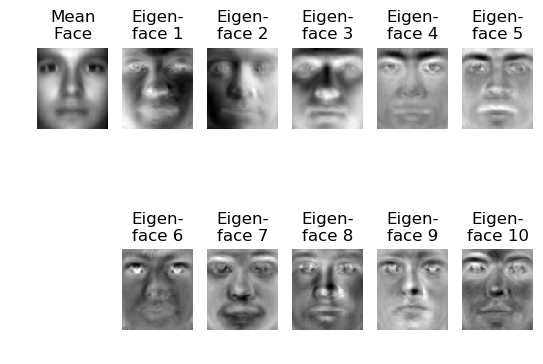

In [6]:
# Display the mean face and the first 10 Eigenfaces in a single figure
function showeigenfaces(U::Array{Float64,2},mu::Array{Float64,2},facedim::Array{Int})
  figure()
  subplot(2,6,1)
  imshow(reshape(mu,facedim...),"gray",interpolation="none")
  axis("off")
  title("Mean\nFace")
  idx = [2:6; 8:12]
  for i = 1:10
    subplot(2,6,idx[i])
    imshow(reshape(U[:,i],facedim...),"gray",interpolation="none")
    axis("off")
    title("Eigen-\nface $i")
  end
  gcf()
  return nothing::Nothing
end
showeigenfaces(U,mu,facedim)

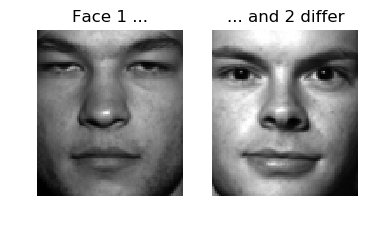

In [7]:
# Fetch a single face with given index out of the data matrix
function takeface(data::Array{Float64,2},facedim::Array{Int},n::Int)
  face = reshape(data[:,n],facedim...)
  return face::Array{Float64,2}
end
faceim = takeface(data,facedim,rand(1:N))
faceim2 = takeface(data,facedim,rand(1:N))
figure()
subplot(231)
imshow(faceim,"gray",interpolation="None"); axis("off"); title("Face 1 ...");
subplot(232)
imshow(faceim2,"gray",interpolation="None"); axis("off"); title("... and 2 differ");

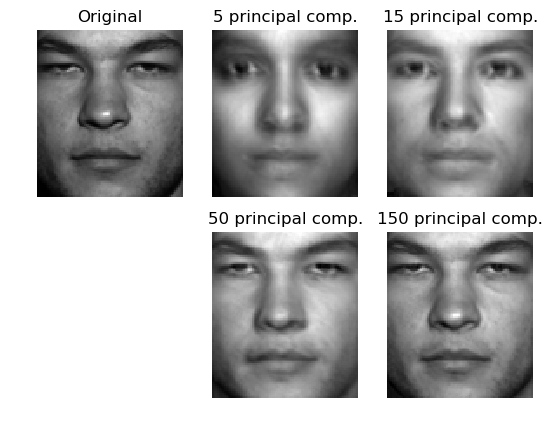

In [8]:
# Project a given face into the low-dimensional space with a given number of principal
# components and reconstruct it afterwards
function computereconstruction(faceim::Array{Float64,2},U::Array{Float64,2},mu::Array{Float64,2},n::Int)
  # Projection
  proj = U[:,1:n]'*(faceim[:]-mu)

  # Reconstruction and reshape
  recon = U[:,1:n]*proj + mu
  recon = reshape(recon,size(faceim))

  return recon::Array{Float64,2}
end

# Display all reconstructed faces in a single figure
function showreconstructedfaces(faceim, f5, f15, f50, f150)
  figure()
  subplot(231)
  imshow(faceim,"gray",interpolation="None")
  axis("off")
  title("Original")
  subplot(232)
  imshow(f5,"gray",interpolation="none")
  axis("off")
  title("5 principal comp.")
  subplot(233)
  imshow(f15,"gray",interpolation="none")
  axis("off")
  title("15 principal comp.")
  subplot(235)
  imshow(f50,"gray",interpolation="none")
  axis("off")
  title("50 principal comp.")
  subplot(236)
  imshow(f150,"gray",interpolation="none")
  axis("off")
  title("150 principal comp.")
  gcf()
  return nothing::Nothing
end
f5 = computereconstruction(faceim,U,mu,5)
f15 = computereconstruction(faceim,U,mu,15)
f50 = computereconstruction(faceim,U,mu,50)
f150 = computereconstruction(faceim,U,mu,150)
showreconstructedfaces(faceim, f5, f15, f50, f150)